### TRABALHO LUI 


NOME: MAYTA SOARES CUSTODIO\
MATRICULA: 192.671.147\
TURMA: 2019.2


###1.1. Descrição do problema

Trabalho de LUI -
Foi passado para vocês um web scrapping para extrair os dados de um site do IMBD, por favor obtendo os dados obtidos pelo scrappig, organize em tabelas (dataframes) os filmes extraídos\
1-	Organize os filmes por gênero\
2-	Organize os filmes por ano 

###1.2. Código disponibilizado com o problema

In [1]:
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

In [17]:
# A url original apresenta apenas os 100 primeiros resultados da pesquisa, porém para esse código irei rodar apenas com esse número, pois se altero
# o número de páginas na url de 'count=100' para 'count=250', ele dá erro na parte de append year_begin = int(clean_years) no 'Feature Film'.
            
url = "https://www.imdb.com/search/title/?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"


In [18]:
# Código fornecido e corrigido

class IMDB(object):
    """docstring for IMDB"""
    def __init__(self, url):
        super(IMDB, self).__init__()
        page = get(url)

        self.soup = BeautifulSoup(page.content, 'lxml')

    def articleTitle(self):
        return self.soup.find("h1", class_="header").text.replace("\n","")

    def bodyContent(self):
        content = self.soup.find(id="main")
        return content.find_all("div", class_="lister-item mode-advanced")

    def movieData(self):
        movieFrame = self.bodyContent()
        movieTitle = []
        movieDate = []
        movieRunTime = []
        movieGenre = []
        movieRating = []
        movieScore = []
        movieDescription = []
        movieDirector = []
        movieStars = []
        movieVotes = []
        movieGross = []
        for movie in movieFrame:
            movieFirstLine = movie.find("h3", class_="lister-item-header")
            movieTitle.append(movieFirstLine.find("a").text)
            movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
            try:
                movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
            except:
                movieRunTime.append(np.nan)
            movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
            try:
                movieRating.append(movie.find("strong").text)
            except:
                movieRating.append(np.nan)
            try:
              #-->FOI NECESSÁRIO CORRIGIR A CLASSE PARA PEGAR CORRETAMENTE O SCORE
                movieScore.append(movie.find("span", class_="metascore mixed").text.rstrip())
            #movieScore.append(movie)
            
            except:
                movieScore.append(np.nan)
            movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
            
            #-->ESTA LINHA movieCast = movie.find("p", class_="") NÃO ESTAVA PEGANDO CORRETAMENTE O DIRECTOR E STARS, POIS ELE ENCONTRAVA UMA OUTRA COMBINAÇÃO DA TAG P COM A CLASS VAZIA.
            # IDENTIFIQUEI QUE TODA 3ª TAG "P" ESTAVA PREENCHIDA E ERA PARA INSERIRI A INFORMAÇÃO DESTES 2 CAMPOS. e DAÍ FOI-SE NECESSÁRIA ESSA MODIFICAÇÃO TAMBÉM
            movieCast = movie.find_all("p")[2]
            try:
                casts = movieCast.text.replace("\n","").split('|')
                casts = [x.strip() for x in casts]
                casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
                movieDirector.append(casts[0])
                movieStars.append([x.strip() for x in casts[1].split(",")])
            except:
                casts = movieCast.text.replace("\n","").strip()
                movieDirector.append(np.nan)
                movieStars.append([x.strip() for x in casts.split(",")])

            movieNumbers = movie.find_all("span", attrs={"name": "nv"})

            if len(movieNumbers) == 2:
                movieVotes.append(movieNumbers[0].text)
                movieGross.append(movieNumbers[1].text)
            elif len(movieNumbers) == 1:
                movieVotes.append(movieNumbers[0].text)
                movieGross.append(np.nan)
            else:
                movieVotes.append(np.nan)
                movieGross.append(np.nan)

        movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, movieScore, movieDescription,
                     movieDirector, movieStars, movieVotes, movieGross]
        #movieData = [movieStars]
        return movieData

In [19]:
# Visualização dos dados em lista

if __name__ == '__main__':
	site1 = IMDB(url)
	print("Subject: ", site1.articleTitle())
	data = site1.movieData()
	for i in range(len(data)):
		print(data[i][:]) #Print the data

Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
['Borat Subsequent Moviefilm', 'The Mandalorian', 'Barbarians', 'Rebecca', 'Scam 1992: The Harshad Mehta Story', 'The Boys', 'The Witches', 'Mirzapur', 'The Trial of the Chicago 7', 'Holidate', 'Hocus Pocus', "Schitt's Creek", 'After We Collided', 'Hubie Halloween', 'Fargo', 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan', 'Supernatural', 'The Alienist: Angel of Darkness', 'Over the Moon', 'The Midnight Sky', 'The Crown', 'Star Trek: Discovery', 'Emily in Paris', 'The Walking Dead', 'This Is Us', 'The Craft: Legacy', 'Game of Thrones', 'The Witches', 'Mank', 'Blood of Zeus', 'On the Rocks', 'Love and Monsters', 'Ratched', 'Tenet', "Grey's Anatomy", 'Cobra Kai', 'Stranger Things', 'Lucifer', 'The Office', 'Peaky Blinders', 'The 100', 'Enola Holmes', 'Vikings', 'American Horror Story', 'Scream', 'Halloween', 'Breaking Bad', 'The Devil All the Time', 'The Addams Family', 'Criminal Minds

##Tratamento dos dados

Fazendo scrapping dos dados

In [20]:
imdb_scrapper = IMDB(url)
data = imdb_scrapper.movieData()
print(data)

[['Borat Subsequent Moviefilm', 'The Mandalorian', 'Barbarians', 'Rebecca', 'Scam 1992: The Harshad Mehta Story', 'The Boys', 'The Witches', 'Mirzapur', 'The Trial of the Chicago 7', 'Holidate', 'Hocus Pocus', "Schitt's Creek", 'After We Collided', 'Hubie Halloween', 'Fargo', 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan', 'Supernatural', 'The Alienist: Angel of Darkness', 'Over the Moon', 'The Midnight Sky', 'The Crown', 'Star Trek: Discovery', 'Emily in Paris', 'The Walking Dead', 'This Is Us', 'The Craft: Legacy', 'Game of Thrones', 'The Witches', 'Mank', 'Blood of Zeus', 'On the Rocks', 'Love and Monsters', 'Ratched', 'Tenet', "Grey's Anatomy", 'Cobra Kai', 'Stranger Things', 'Lucifer', 'The Office', 'Peaky Blinders', 'The 100', 'Enola Holmes', 'Vikings', 'American Horror Story', 'Scream', 'Halloween', 'Breaking Bad', 'The Devil All the Time', 'The Addams Family', 'Criminal Minds', 'Dexter', 'The Nightmare Before Christmas', 'Lovecraft Country

Checando se os dados foram copiados

In [21]:
for i, col in enumerate(data):
    first_row_value = col[0]
    print(f'Column {i+1} has {len(col)} values. First value: {col[0]}')

Column 1 has 100 values. First value: Borat Subsequent Moviefilm
Column 2 has 100 values. First value: 2020
Column 3 has 100 values. First value: 95
Column 4 has 100 values. First value: ['Comedy']
Column 5 has 100 values. First value: 6.9
Column 6 has 100 values. First value: nan
Column 7 has 100 values. First value: Follow-up film to the 2006 comedy centering on the real-life adventures of a fictional Kazakh television journalist named Borat.
Column 8 has 100 values. First value: Jason Woliner
Column 9 has 100 values. First value: ['Sacha Baron Cohen', 'Maria Bakalova', 'Tom Hanks', 'Dani Popescu']
Column 10 has 100 values. First value: 69,615
Column 11 has 100 values. First value: nan


Renomeando as colunas

In [22]:
data2 = {}
data2['Title'] = data[0]
data2['Year'] = data[1]
data2['Runtime'] = data[2] 
data2['Genre'] = data[3]
data2['Rating'] = data[4]
data2['Score'] = data[5]
data2['Description'] = data[6]
data2['Director'] = data[7]
data2['Stars'] = data[8]
data2['Votes'] = data[9]
data2['Gross'] = data[10]

Modificando as colunas de data para séries e filmes e também criando uma nova coluna informando se trata-se de série (em andamento = ongoing) ou filme (Em branco)


In [29]:
import re

def parse_years(years_list):
    title_types = []
    year_begins = []
    year_ends = []
    for raw_years in years_list:
        # Strip value of anythin but numbers and dash (-)
        clean_years = re.sub(r'[^0-9–]+', '', raw_years)
        # If it has a dash (-), it is a TV Series
        if '–' in clean_years:
            title_type = 'TV Series'
            splitted_years = clean_years.split('–')
            year_begin = int(splitted_years[0])
            year_end = splitted_years[1]
            if year_end == '':
                year_end = 'ongoing'
        # If it don't have a dash (-), it is a movie
        
        else:
            title_type = 'Feature Film'
            year_begin = (clean_years)  # MODIFIQUEI O QUE ESTAVA: int(clean_years), POIS DEU ERRO, TIREI O 'INT'
            year_end = ''             
        title_types.append(title_type)
        year_begins.append(year_begin)     
        year_ends.append(year_end)
    return [title_types, year_begins, year_ends]

# a, b, c = parse_years(data[1])
# pd.DataFrame(parse_years(data[1])).T.head(8)

types, y_begin, y_end = parse_years(data2['Year'])

data2['Title Type'] = types
data2['Year (Begin)'] = y_begin
data2['Year (End)'] = y_end

## Formatando os dados em um dataframe

In [30]:
df = pd.DataFrame(data2)
df.head(3)

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title Type,Year (Begin),Year (End)
0,Borat Subsequent Moviefilm,2020,95,[Comedy],6.9,NaN,Follow-up film to the 2006 comedy centering on...,Jason Woliner,"[Sacha Baron Cohen, Maria Bakalova, Tom Hanks,...","69,615",NaN,Feature Film,2020,
1,The Mandalorian,2019–,40,"[Action, Adventure, Sci-Fi]",8.7,NaN,The travels of a lone bounty hunter in the out...,NaN,"[Stars:Pedro Pascal, Carl Weathers, Gina Caran...","205,651",NaN,TV Series,2019,ongoing
2,Barbarians,2020–,280,"[Action, Adventure, Drama]",7.3,NaN,"The famous battle of the Teutoburg Forest, in ...",NaN,"[Stars:Laurence Rupp, Jeanne Goursaud, David S...","8,431",NaN,TV Series,2020,ongoing


In [31]:
df.shape

(100, 14)

In [32]:
df.dtypes

Title           object
Year            object
Runtime         object
Genre           object
Rating          object
Score           object
Description     object
Director        object
Stars           object
Votes           object
Gross           object
Title Type      object
Year (Begin)    object
Year (End)      object
dtype: object

In [33]:
# Renomeando as colunas Title Type, Year (Begin) e Year (End) que estão com espaço

df2 = df.rename(columns={'Title Type':'Title_Type', 'Year (Begin)': 'Year_(Begin)',  'Year (End)': ' Year_(End)'})
df2.head()

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
0,Borat Subsequent Moviefilm,2020,95,[Comedy],6.9,NaN,Follow-up film to the 2006 comedy centering on...,Jason Woliner,"[Sacha Baron Cohen, Maria Bakalova, Tom Hanks,...","69,615",NaN,Feature Film,2020,
1,The Mandalorian,2019–,40,"[Action, Adventure, Sci-Fi]",8.7,NaN,The travels of a lone bounty hunter in the out...,NaN,"[Stars:Pedro Pascal, Carl Weathers, Gina Caran...","205,651",NaN,TV Series,2019,ongoing
2,Barbarians,2020–,280,"[Action, Adventure, Drama]",7.3,NaN,"The famous battle of the Teutoburg Forest, in ...",NaN,"[Stars:Laurence Rupp, Jeanne Goursaud, David S...","8,431",NaN,TV Series,2020,ongoing
3,Rebecca,2020,121,"[Drama, Mystery, Romance]",6.0,46,A young newlywed arrives at her husband's impo...,Ben Wheatley,"[Lily James, Armie Hammer, Kristin Scott Thoma...","16,609",NaN,Feature Film,2020,
4,Scam 1992: The Harshad Mehta Story,2020–,54,"[Biography, Crime, Drama]",9.6,NaN,"Set in 1980's and 90's Bombay, it follows the ...",NaN,"[Stars:Shreya Dhanwanthary, Pratik Gandhi, Anj...","46,580",NaN,TV Series,2020,ongoing


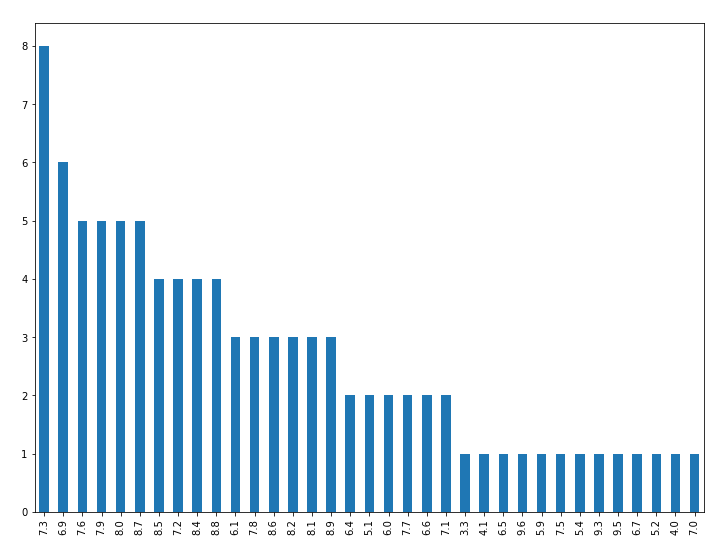

In [34]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 9))
rating = df['Rating'].value_counts()
rating.plot(kind='bar')
plt.xlabel('Nota', color='white')
plt.ylabel('Quantidade de Filmes', color='white')
plt.title('Nota por Filmes', color='white')
plt.show()

In [35]:
df2_attr = [attr for attr in df.columns]
for attr in df2_attr:
    print(attr)

Title
Year
Runtime
Genre
Rating
Score
Description
Director
Stars
Votes
Gross
Title Type
Year (Begin)
Year (End)


In [36]:
# Verificando informações do dataframe

df2.describe()

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
count,100,100,90,100,93,14,100,44,100,93,17,100,100,100
unique,98,46,50,52,35,10,100,43,100,93,17,2,35,12
top,Rebecca,2020,60,[Comedy],7.3,55,A team of part-time paranormal investigators u...,Tim Burton,"[Stars:Jennifer Aniston, Courteney Cox, Lisa K...","42,741",$327.48M,TV Series,2020,
freq,2,23,14,7,8,3,1,2,1,1,1,56,24,44


In [37]:
# Verificando informações de nulos

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         100 non-null    object
 1   Year          100 non-null    object
 2   Runtime       90 non-null     object
 3   Genre         100 non-null    object
 4   Rating        93 non-null     object
 5   Score         14 non-null     object
 6   Description   100 non-null    object
 7   Director      44 non-null     object
 8   Stars         100 non-null    object
 9   Votes         93 non-null     object
 10  Gross         17 non-null     object
 11  Title_Type    100 non-null    object
 12  Year_(Begin)  100 non-null    object
 13   Year_(End)   100 non-null    object
dtypes: object(14)
memory usage: 11.1+ KB


In [38]:
# Verificando o somatório dos valores nulos NaN, notamos que Score e Gross possuem muitos valores faltantes,
# pois muitos filmes são novos e ainda não possuem um valor certo para essas colunas.

df2.isnull().sum()

Title            0
Year             0
Runtime         10
Genre            0
Rating           7
Score           86
Description      0
Director        56
Stars            0
Votes            7
Gross           83
Title_Type       0
Year_(Begin)     0
 Year_(End)      0
dtype: int64

In [39]:
pip install seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


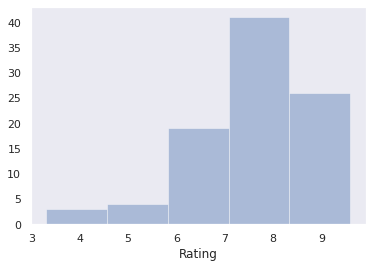

In [55]:
# Plotamos um histograma para visualização do 'rating'(avaliação dos filmes), por quantidade de filmes.

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df2['Rating'],kde = False, bins=5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


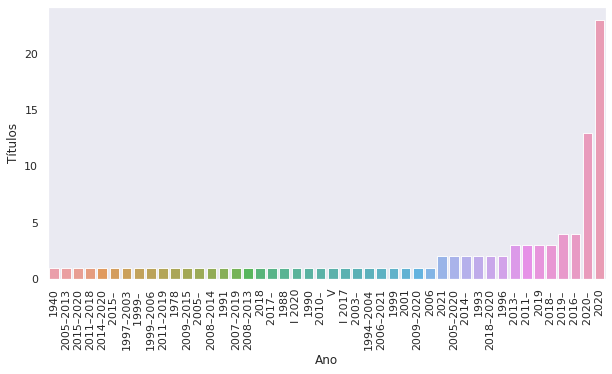

In [52]:
# Histograma de Filmes x Ano. A maior parte foi produzida mais recentemente >ano 2000/2010

sns.set(style="dark")
plt.figure(figsize=(10,5))
rest = df2['Year'].value_counts().sort_values()
sns.barplot(rest.index, rest.values, alpha=0.9)
plt.ylabel('Títulos', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Ano', fontsize=12)
plt.show()

In [56]:
# Ordenando os títulos por Gênero: O gênero que aparece em primeiro é a combinação de 'Ação, aventura, comédia'

genre = df2.sort_values('Genre')
genre.head()

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
78,The Umbrella Academy,2019–,60,"[Action, Adventure, Comedy]",8.0,NaN,"A family of former child heroes, now grown apa...",NaN,"[Stars:Ellen Page, Tom Hopper, David Castañeda...","144,536",NaN,TV Series,2019,ongoing
31,Love and Monsters,2020,109,"[Action, Adventure, Comedy]",7.0,59,"In a monster-infested world, Joel learns his g...",Michael Matthews,"[Dylan O'Brien, Jessica Henwick, Michael Rooke...","14,241",NaN,Feature Film,2020,
2,Barbarians,2020–,280,"[Action, Adventure, Drama]",7.3,NaN,"The famous battle of the Teutoburg Forest, in ...",NaN,"[Stars:Laurence Rupp, Jeanne Goursaud, David S...","8,431",NaN,TV Series,2020,ongoing
21,Star Trek: Discovery,2017–,60,"[Action, Adventure, Drama]",7.3,NaN,"Ten years before Kirk, Spock, and the Enterpri...",NaN,"[Stars:Sonequa Martin-Green, Doug Jones, Antho...","85,643",NaN,TV Series,2017,ongoing
26,Game of Thrones,2011–2019,57,"[Action, Adventure, Drama]",9.3,NaN,Nine noble families fight for control over the...,NaN,"[Stars:Emilia Clarke, Peter Dinklage, Kit Hari...","1,721,691",NaN,TV Series,2011,2019


In [57]:
# Ordenando os títulos por Ano: O primeiro 'lançamento' da listagem é o filme Rebecca de 1940.

year = df2.sort_values('Year')
year.head()

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
57,Rebecca,1940,130,"[Drama, Mystery, Romance]",8.1,NaN,A self-conscious woman juggles adjusting to he...,Alfred Hitchcock,"[Laurence Olivier, Joan Fontaine, George Sande...","121,487",$4.36M,Feature Film,1940,
45,Halloween,1978,91,"[Horror, Thriller]",7.8,NaN,Fifteen years after murdering his sister on Ha...,John Carpenter,"[Donald Pleasence, Jamie Lee Curtis, Tony Mora...","228,991",$47.00M,Feature Film,1978,
54,Beetlejuice,1988,92,"[Comedy, Fantasy]",7.5,NaN,The spirits of a deceased couple are harassed ...,Tim Burton,"[Alec Baldwin, Geena Davis, Michael Keaton, An...","259,270",$73.71M,Feature Film,1988,
27,The Witches,1990,91,"[Adventure, Comedy, Family]",6.9,NaN,A young boy stumbles onto a witch convention a...,Nicolas Roeg,"[Anjelica Huston, Mai Zetterling, Jasen Fisher...","41,428",$10.36M,Feature Film,1990,
48,The Addams Family,1991,99,"[Comedy, Fantasy]",6.9,57,Con artists plan to fleece an eccentric family...,Barry Sonnenfeld,"[Anjelica Huston, Raul Julia, Christopher Lloy...","133,723",$113.50M,Feature Film,1991,


In [58]:
df2[['Genre']] = df2[['Genre']].astype(str)

In [59]:
# Ordenando os títulos primeiro por gênero e depois por ano no mesmo dataframe

df2.sort_values(['Genre','Year']).head()

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
78,The Umbrella Academy,2019–,60,"['Action', ' Adventure', ' Comedy']",8.0,NaN,"A family of former child heroes, now grown apa...",NaN,"[Stars:Ellen Page, Tom Hopper, David Castañeda...","144,536",NaN,TV Series,2019,ongoing
31,Love and Monsters,2020,109,"['Action', ' Adventure', ' Comedy']",7.0,59,"In a monster-infested world, Joel learns his g...",Michael Matthews,"[Dylan O'Brien, Jessica Henwick, Michael Rooke...","14,241",NaN,Feature Film,2020,
26,Game of Thrones,2011–2019,57,"['Action', ' Adventure', ' Drama']",9.3,NaN,Nine noble families fight for control over the...,NaN,"[Stars:Emilia Clarke, Peter Dinklage, Kit Hari...","1,721,691",NaN,TV Series,2011,2019
42,Vikings,2013–,44,"['Action', ' Adventure', ' Drama']",8.5,NaN,Vikings transports us to the brutal and myster...,NaN,"[Stars:Katheryn Winnick, Alexander Ludwig, Gus...","408,870",NaN,TV Series,2013,ongoing
21,Star Trek: Discovery,2017–,60,"['Action', ' Adventure', ' Drama']",7.3,NaN,"Ten years before Kirk, Spock, and the Enterpri...",NaN,"[Stars:Sonequa Martin-Green, Doug Jones, Antho...","85,643",NaN,TV Series,2017,ongoing


In [60]:
# Agrupando pelo gênero para visualização de informações gerais

df2.groupby('Genre').count().head()

,Title,Year,Runtime,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
Genre,,,,,,,,,,,,,
"['Action', ' Adventure', ' Comedy']",2,2,2,2,1,2,1,2,2,0,2,2,2
"['Action', ' Adventure', ' Drama']",5,5,4,5,0,5,0,5,5,0,5,5,5
"['Action', ' Adventure', ' Fantasy']",1,1,0,0,0,1,1,1,0,0,1,1,1
"['Action', ' Adventure', ' Sci-Fi']",1,1,1,1,0,1,0,1,1,0,1,1,1
"['Action', ' Comedy', ' Crime']",2,2,2,2,1,2,1,2,2,0,2,2,2


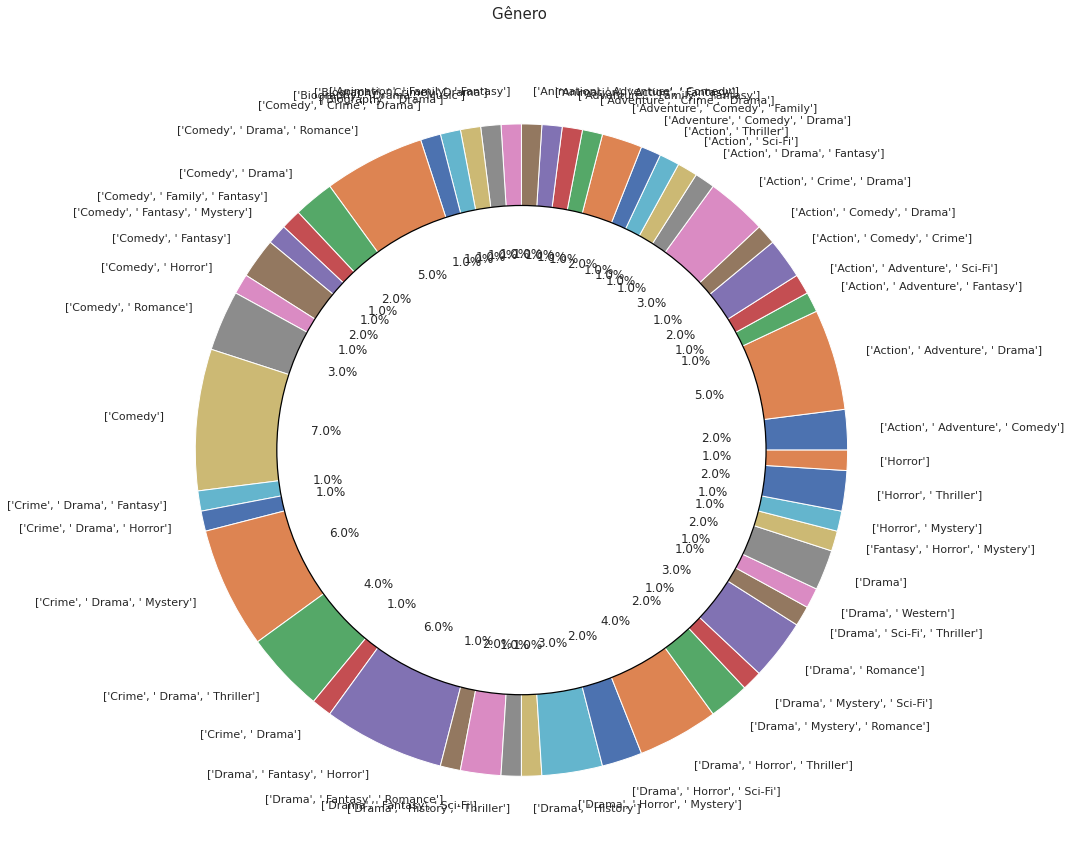

In [61]:
# No chart abaixo vemos que muitos gêneros foram sobrepostos por se tratarem de alternações de mesmos temas,  
# porém, conseguimos verficar mesmo assim, que as categorias de 'Comedy', 'Action,Adventure,Drama' e 'Crime,Drama,Mistery',  
# são as maiorias


sns.set(style="dark")
labels = df2['Genre'].astype('category').cat.categories.tolist()
counts = df2['Genre'].value_counts().sort_values()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))
ax1.set_title('Gênero \n', fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [62]:
# Instalando biblioteca profiling para análise

!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 604kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 3.1MB 11.4MB/s 
     |████████████████████████████████| 296kB 26.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=b80503d66770e1d730e679078ccd4c476d11545b27d3149f97cd98340630d533
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=547d1b642dacaf8a9c13fe26c3d271f89ba4850f787c36a9a1569364aa0a81c2
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [63]:
import pandas_profiling 
pandas_profiling.ProfileReport(df2)

### Alguns pontos observados:
- coluna 'year', a maior parte dos filmes e séries pertencem a 2020, ou seja, nessa categoria do IMDB, "Filmes / série de TV  por popularidade', temos mais títulos novos;
- tempo de duração com maior frequência de 60min;
- gêneros liderados por comédia e drama, acompanhados de outras classificações;
- avaliações acima de 8.0 nas maiores frequencias;
- número de séries bem acima de filmes na listagem;
- Ano de início dos títilos em maior parte após o ano 2000.




In [64]:
# Listando os títulos com as maiores notas, notamos que se tratam de séries e não filmes e que o gênero 'Crime' e 'Drama' são comuns ao primeiros lugares

rating = df2.sort_values('Rating', ascending=False)[0:10]
rating

,Title,Year,Runtime,Genre,Rating,Score,Description,Director,Stars,Votes,Gross,Title_Type,Year_(Begin),Year_(End)
4,Scam 1992: The Harshad Mehta Story,2020–,54,"['Biography', ' Crime', ' Drama']",9.6,NaN,"Set in 1980's and 90's Bombay, it follows the ...",NaN,"[Stars:Shreya Dhanwanthary, Pratik Gandhi, Anj...","46,580",NaN,TV Series,2020,ongoing
46,Breaking Bad,2008–2013,49,"['Crime', ' Drama', ' Thriller']",9.5,NaN,A high school chemistry teacher diagnosed with...,NaN,"[Stars:Bryan Cranston, Aaron Paul, Anna Gunn, ...","1,411,059",NaN,TV Series,2008,2013
26,Game of Thrones,2011–2019,57,"['Action', ' Adventure', ' Drama']",9.3,NaN,Nine noble families fight for control over the...,NaN,"[Stars:Emilia Clarke, Peter Dinklage, Kit Hari...","1,721,691",NaN,TV Series,2011,2019
55,Friends,1994–2004,22,"['Comedy', ' Romance']",8.9,NaN,Follows the personal and professional lives of...,NaN,"[Stars:Jennifer Aniston, Courteney Cox, Lisa K...","797,148",NaN,TV Series,1994,2004
38,The Office,2005–2013,22,['Comedy'],8.9,NaN,A mockumentary on a group of typical office wo...,NaN,"[Stars:Steve Carell, Jenna Fischer, John Krasi...","388,453",NaN,TV Series,2005,2013
14,Fargo,2014–,53,"['Crime', ' Drama', ' Thriller']",8.9,NaN,"Various chronicles of deception, intrigue and ...",NaN,"[Stars:Billy Bob Thornton, Martin Freeman, Chr...","315,250",NaN,TV Series,2014,ongoing
92,Black Mirror,2011–,60,"['Drama', ' Sci-Fi', ' Thriller']",8.8,NaN,"An anthology series exploring a twisted, high-...",NaN,"[Stars:Daniel Lapaine, Hannah John-Kamen, Mich...","425,437",NaN,TV Series,2011,ongoing
39,Peaky Blinders,2013–,60,"['Crime', ' Drama']",8.8,NaN,"A gangster family epic set in 1900s England, c...",NaN,"[Stars:Cillian Murphy, Paul Anderson, Helen Mc...","319,099",NaN,TV Series,2013,ongoing
61,The West Wing,1999–2006,44,['Drama'],8.8,NaN,Inside the lives of staffers in the West Wing ...,NaN,"[Stars:Martin Sheen, Rob Lowe, Allison Janney,...","62,102",NaN,TV Series,1999,2006
36,Stranger Things,2016–,51,"['Drama', ' Fantasy', ' Horror']",8.8,NaN,"When a young boy disappears, his mother, a pol...",NaN,"[Stars:Millie Bobby Brown, Finn Wolfhard, Wino...","783,370",NaN,TV Series,2016,ongoing


### Conclusão

Tive dificuldades com o código inicial fornecido, pois constava importação com erro de algumas colunas, estava prosseguindo no trabalho sem as essas colunas, mas usei o código corrigido fornecido no talk para refazer e fiz uma correção eu mesma na parte do ano dos filmes. A parte de utilização da biblioteca profiling também vi em sugestão de outro trabalho e usei para incrementar a análise porque achei muito interessante e não conhecia. O trabalho foi interessante, porém scrapping não é uma tarefa simples e entendo que irá demandar mais estudos para um domínios mais profissional, mas a essência foi muito bem passada pelos professores e gostei muito de como se extraem dados dos sites, pois não tenho experiência anterior em html e programação.

### Obrigada!